Check out the Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

Note: You'll need to make an account to access the data.


In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df=pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

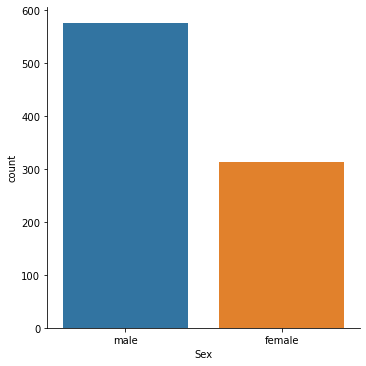

In [27]:
sns.catplot(x='Sex',data=titanic_df,kind="count")

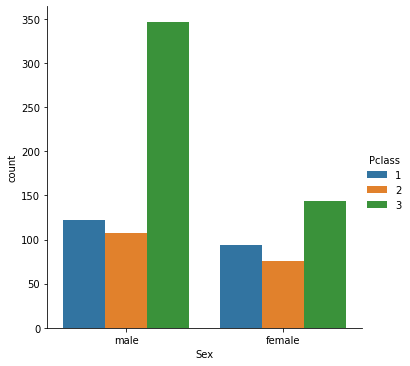

In [28]:
sns.catplot(x='Sex',data=titanic_df,kind="count",hue='Pclass')

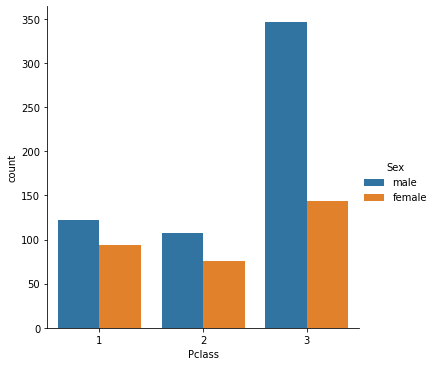

In [29]:
sns.catplot(x='Pclass',data=titanic_df,kind="count",hue='Sex')

In [32]:
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex
        
        
    

In [33]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [36]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


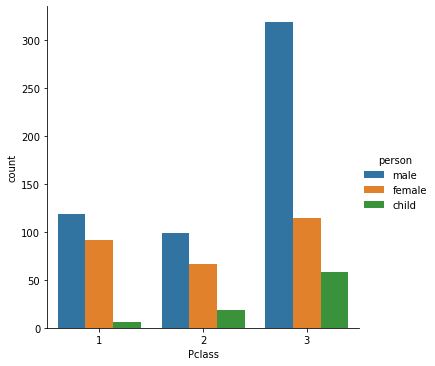

In [37]:
sns.catplot(x='Pclass',data=titanic_df,kind="count",hue='person')

<AxesSubplot:>

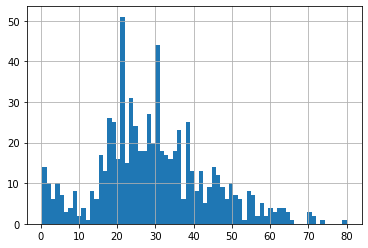

In [38]:
 titanic_df['Age'].hist(bins=70)

In [39]:
titanic_df['Age'].mean()

29.69911764705882

In [40]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

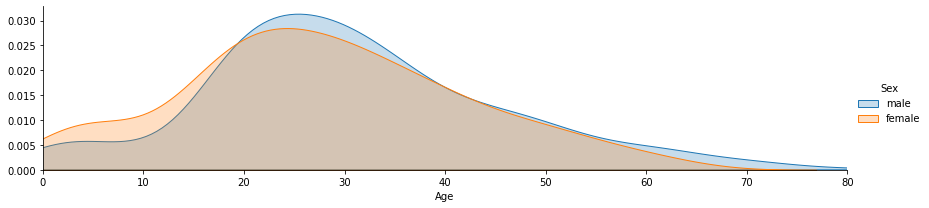

In [43]:
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

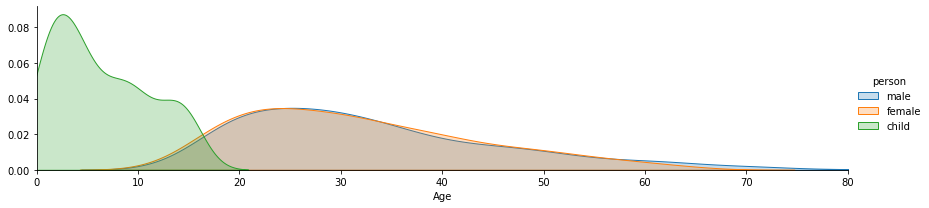

In [44]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

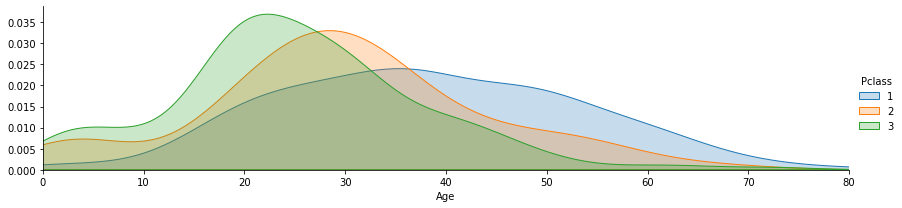

In [46]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [47]:
deck=titanic_df['Cabin'].dropna()

In [48]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

,Cabin
0,C
1,C
2,E
3,G
4,C


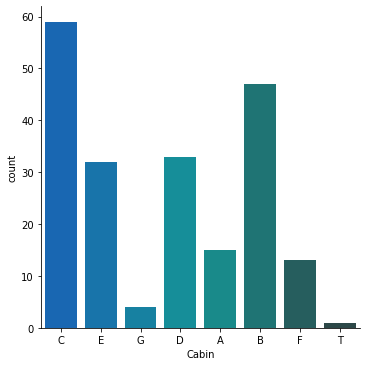

In [51]:
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
sns.catplot(x='Cabin',data=cabin_df,kind="count",palette='winter_d')
cabin_df.head()


In [52]:
cabin_df=cabin_df[cabin_df!='T']

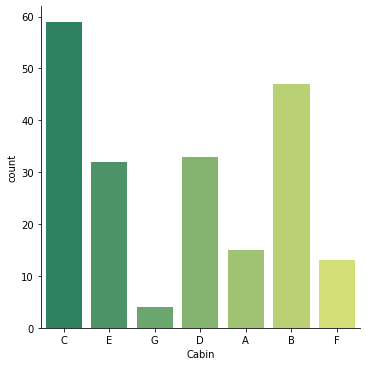

In [53]:
sns.catplot(x='Cabin',data=cabin_df,kind="count",palette='summer')

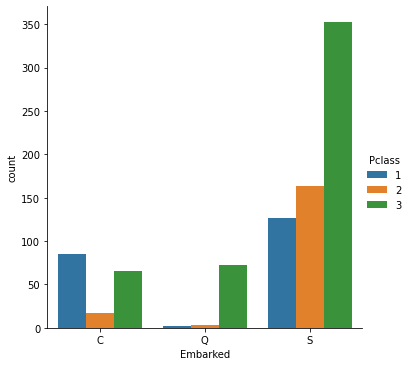

In [57]:
sns.catplot(x='Embarked',data=titanic_df,kind="count",hue='Pclass',order=['C','Q','S'])

In [58]:
titanic_df['Alone']=titanic_df.SibSp+titanic_df.Parch

In [60]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [61]:
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

D:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [62]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


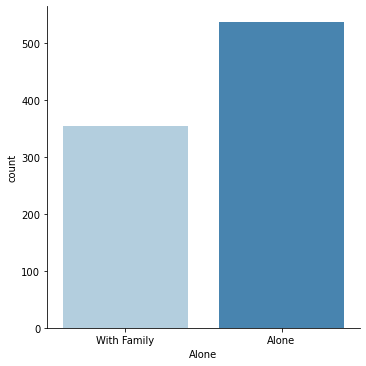

In [63]:
sns.catplot(x='Alone',data=titanic_df,kind="count",palette='Blues')

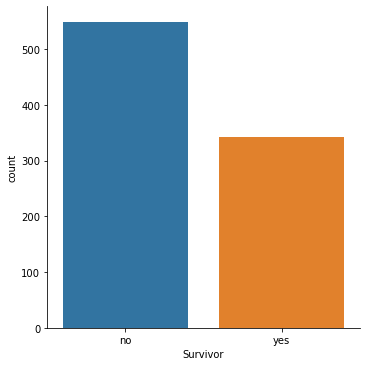

In [65]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})
sns.catplot(x='Survivor',data=titanic_df,kind="count")

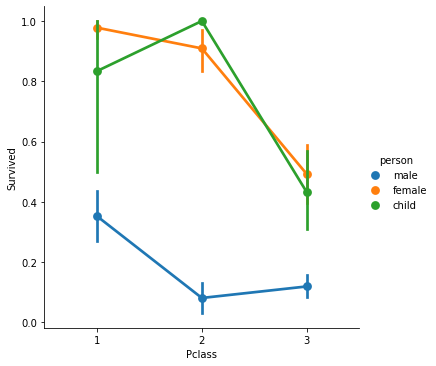

In [69]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind="point",hue='person')

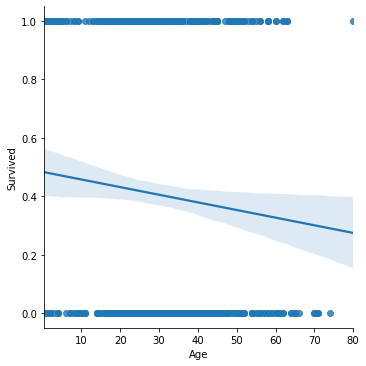

In [71]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

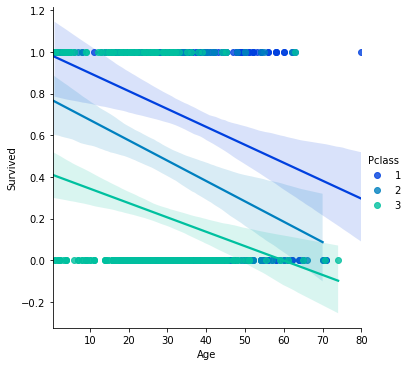

In [72]:
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter')

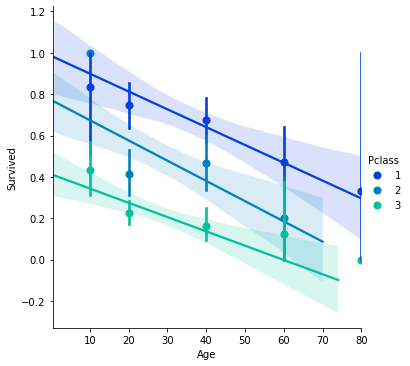

In [73]:
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter',x_bins=generations)

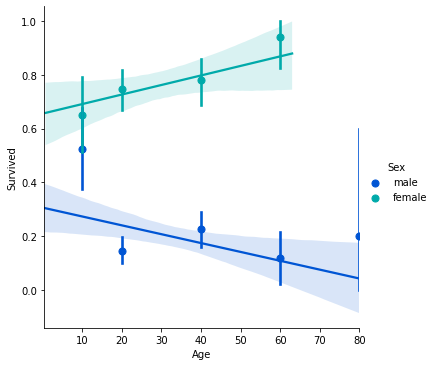

In [74]:
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Sex',palette='winter',x_bins=generations)